In [1]:
from tensorflow.keras.layers import *
import numpy as np
import matplotlib.pyplot as plt
import h5py
from tensorflow.keras import Sequential
from data import Data

In [4]:

data = Data("data")
data.config_iter(64,3)
len(data)
data.__iter__()

<generator object Data.__gen at 0x1585c9770>

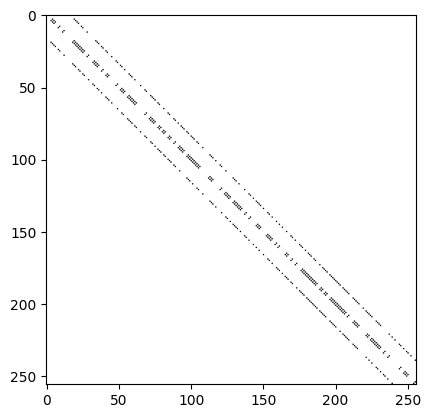

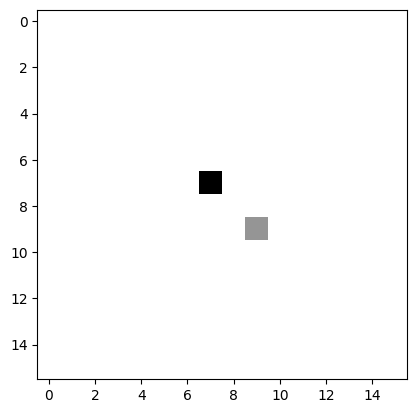

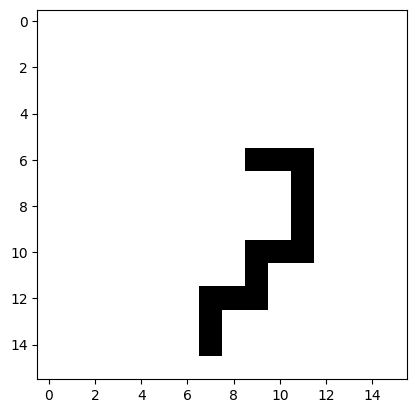

In [17]:
x1,x2,y = next(data)
plt.imshow(np.squeeze(x1[0]),cmap="Greys")
plt.show()
plt.imshow(np.squeeze(x2[0]),cmap="Greys")
plt.show()
plt.imshow(np.squeeze(y[2]),cmap="Greys")
plt.show()